# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.set_option('max_row', None)

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [6]:
def clean_headers(df):
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    return df

In [7]:
customer_df.rename(columns={'EmploymentStatus':'Employment Status'}, inplace=True)
clean_headers(customer_df)

customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change effective to date column to datetime format.

In [8]:
customer_df['effective_to_date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

> The values in the column dont require cleaning before conversion into datetime 

In [9]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(pd.to_datetime, errors='coerce')

In [10]:
customer_df['effective_to_date'].isna().sum()

0

### 6. Check NaN values per column.

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
# checking for zeros to replace in numerical columns

for column in customer_df.select_dtypes(np.number):
    print(column, len(customer_df[customer_df[column] == 0]), '\n')

customer_lifetime_value 0 

income 2317 

monthly_premium_auto 0 

months_since_last_claim 314 

months_since_policy_inception 83 

number_of_open_complaints 7252 

number_of_policies 0 

total_claim_amount 0 



> O as a value makes sense in all columns except probably in the income column. Replacing 0 with the median

In [13]:
customer_df['income'] = customer_df['income'].fillna(customer_df['income'].median())

### 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [14]:
for column in customer_df.columns:
    print(column, customer_df[column].nunique(), customer_df[column].dtypes, '\n')

customer 9134 object 

state 5 object 

customer_lifetime_value 8041 float64 

response 2 object 

coverage 3 object 

education 5 object 

effective_to_date 59 datetime64[ns] 

employment_status 5 object 

gender 2 object 

income 5694 int64 

location_code 3 object 

marital_status 3 object 

monthly_premium_auto 202 int64 

months_since_last_claim 36 int64 

months_since_policy_inception 100 int64 

number_of_open_complaints 6 int64 

number_of_policies 9 int64 

policy_type 3 object 

policy 9 object 

renew_offer_type 4 object 

sales_channel 4 object 

total_claim_amount 5106 float64 

vehicle_class 6 object 

vehicle_size 3 object 



> For this dataset, to separate descrete from continuous variables, you can argue that a threshold of right above 200 unique values makes sense, to have 'monthly_premium_auto' still categorized as discrete. The lower threshold should be 6 to filter out the categorial values, accepting that 'number_of_open_complaints' gets recategorized because it also has only 6 unique values. 

In [15]:
def var_checker(df, cat, disc, skip_columns=[]):
    df_cat = df.copy()
    df_discrect = df.copy()
    df_cont = df.copy()
    
    for column in df.columns:
        if column not in skip_columns:
            if df[column].nunique() <= cat:
                df_cat[column] =  df_cat[column].astype('category')
                df_discrect = df_discrect.drop(column, axis=1)
                df_cont = df_cont.drop(column, axis=1)
            elif (df[column].nunique() > cat) & (df[column].nunique() < disc):
                df_cat = df_cat.drop(column, axis=1)
                df_cont = df_cont.drop(column, axis=1)
            else:
                df_cat = df_cat.drop(column, axis=1)
                df_discrect = df_discrect.drop(column, axis=1)
    return df_cat, df_discrect, df_cont


In [16]:
customer_cat, custumer_discret, custumer_cont = var_checker(customer_df, cat=6, disc=210)

customer_cat.head()
#custumer_discret.head()
#custumer_cont.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,number_of_open_complaints,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [17]:
# checking for values to clean in categorical columns

for column in customer_df.select_dtypes(np.object):
    print(column, customer_df[column].unique(), '\n')

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826'] 

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

response ['No' 'Yes'] 

coverage ['Basic' 'Extended' 'Premium'] 

education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

employment_status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'] 

gender ['F' 'M'] 

location_code ['Suburban' 'Rural' 'Urban'] 

marital_status ['Married' 'Single' 'Divorced'] 

policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto'] 

policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3'] 

renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4'] 

sales_channel ['Agent' 'Call Center' 'Web' 'Branch'] 

vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car'] 

vehicle_size ['Medsize' 'Small' 'Large'] 



> no replacements neccessary

### 9. Get categorical features.

In [18]:
customer_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,number_of_open_complaints,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


### 10. What should we do with the customer_id column?

In [19]:
customer_df.rename(columns={'customer':'id'}, inplace=True)
customer_df = customer_df.set_index('id')

In [20]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
id,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
# creating a df with numerical columns for tansformation tests later in lab 4.06

customer_num = customer_df.select_dtypes(include=[np.number])

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## 1. Open the categoricals variable we created before.

In [22]:
customer_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,number_of_open_complaints,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

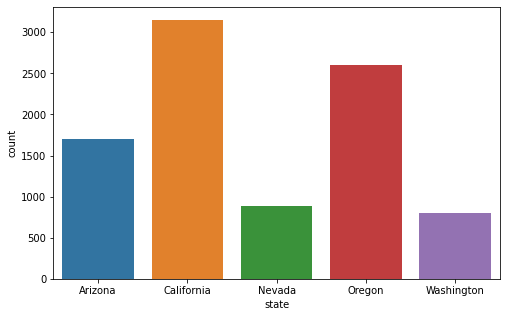

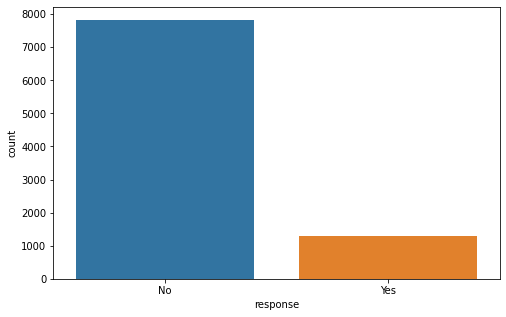

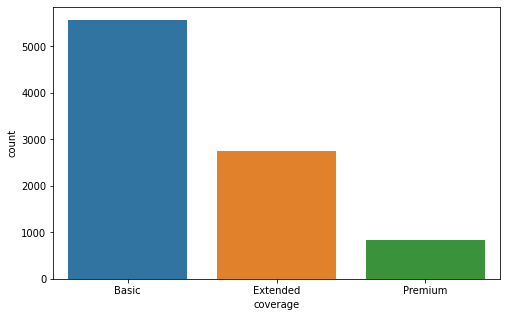

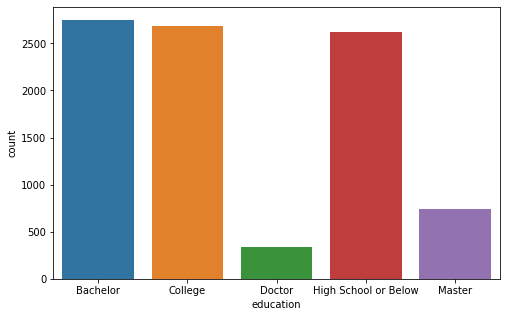

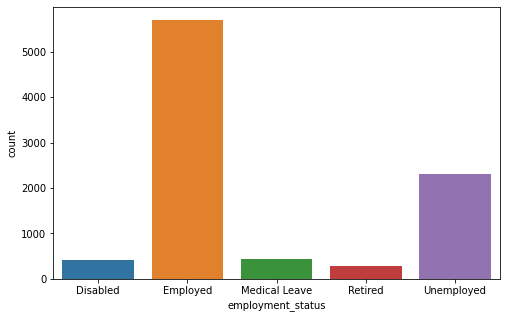

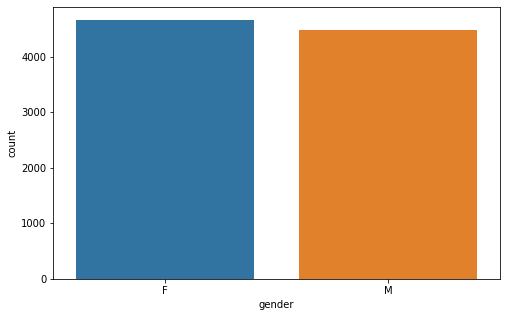

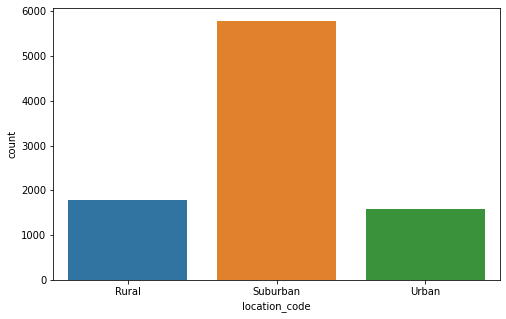

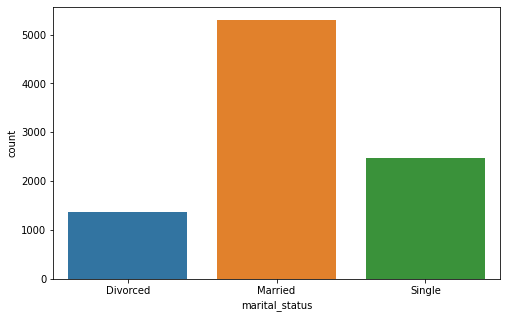

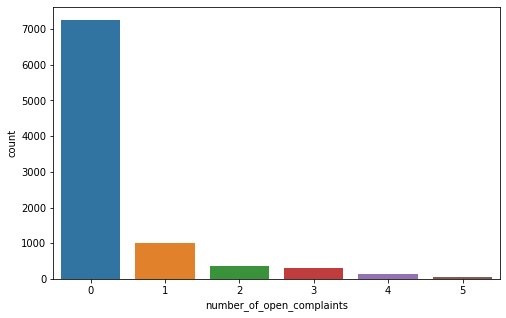

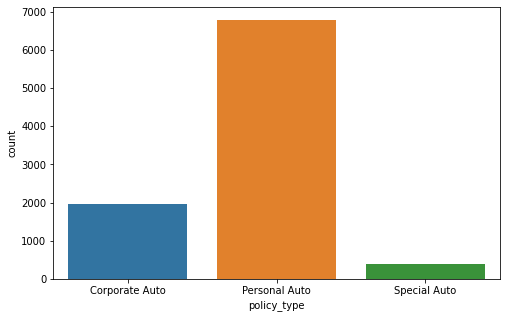

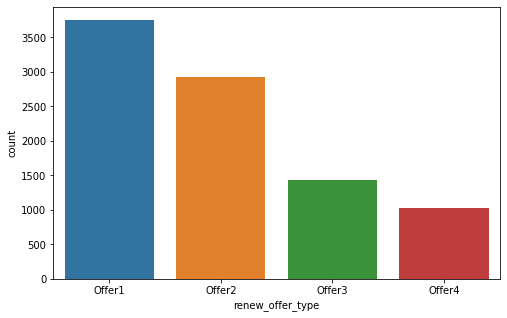

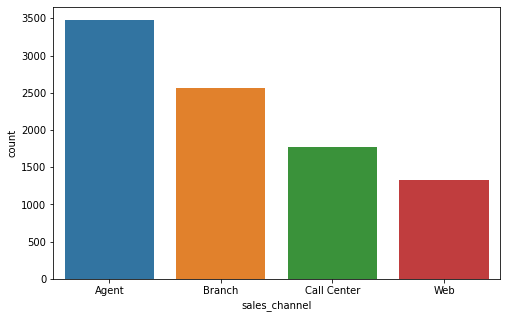

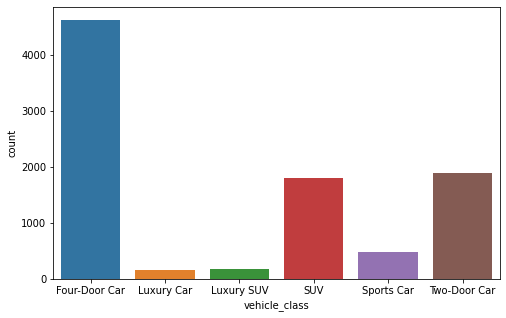

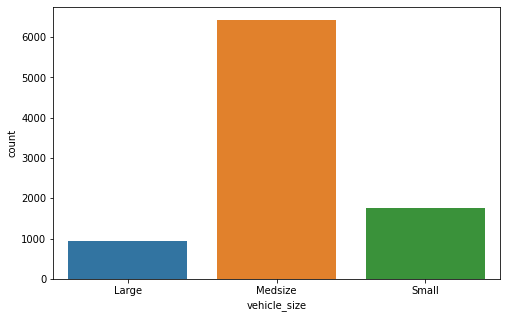

In [23]:
for column in customer_cat:
    plt.figure(figsize=(8,5))
    sns.countplot(x=customer_cat[column])
    plt.show()

Judging by simple count plots the values in most columns show no particular distribution, that provide any deeper insight into the data. For some columns you can still argue that some preprocessing can make sense to simplify the data.

- response:
    A large majority of values is 'no'. In a very large dataset you could consider dropping the column, since it is highly skewed towards one value and therefore might not have a big impact on a prediction
- no of open complaints:
    Values larger than 1 occour not that often. You could group them to simplify the data
- Some columns have similar value distributions to other columns
    - Married - Vehicle size - policy type
    - Renew offer type - sales channel

    In the next step I check their relation with each other to check if there are redundancies 
    

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

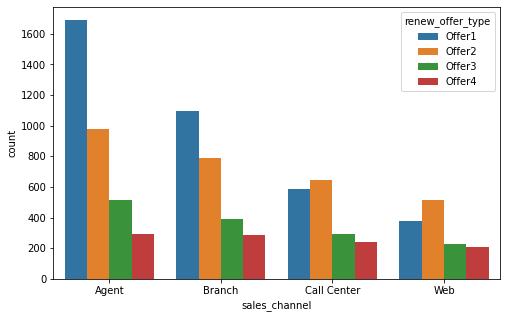

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x=customer_cat['sales_channel'], hue=customer_cat['renew_offer_type'])
plt.show()

The distrbution for 'renew_offer_type' are similar for sales channels 'agent' and 'branch' as for 'call center' and 'web'. If they are similar enough to suggest that the offer type is independent from the sales channel is still hard to say.

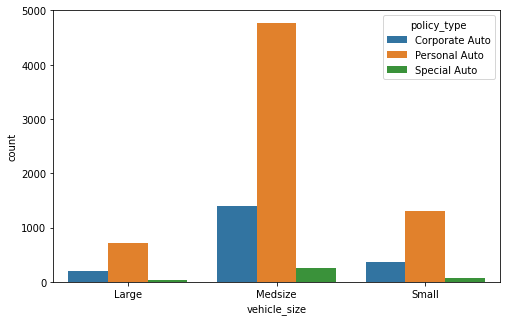

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x=customer_cat['vehicle_size'], hue=customer_cat['policy_type'])
plt.show()

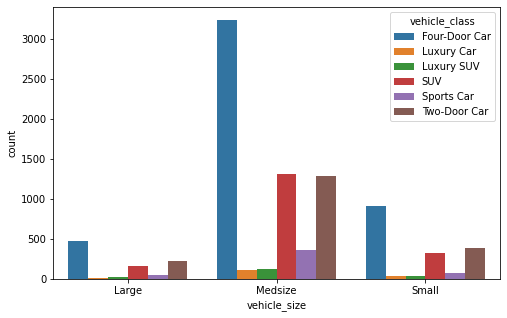

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x=customer_cat['vehicle_size'], hue=customer_cat['vehicle_class'])
plt.show()

Despite their similar distributions, policy types are very similarly distributed across all vehicle sizes. The same is true for vehicle class, not supporting the assumption that vehicle size and class are redunduant.

> The relation examples I checked to find clear redundancies, turn out to be not clear at all. To make a more sound decision if columns could be dropped, a more in depth analysis is nesseccary, such as chi-squared. 

## 4. Plot time variable. Can you extract something from it?

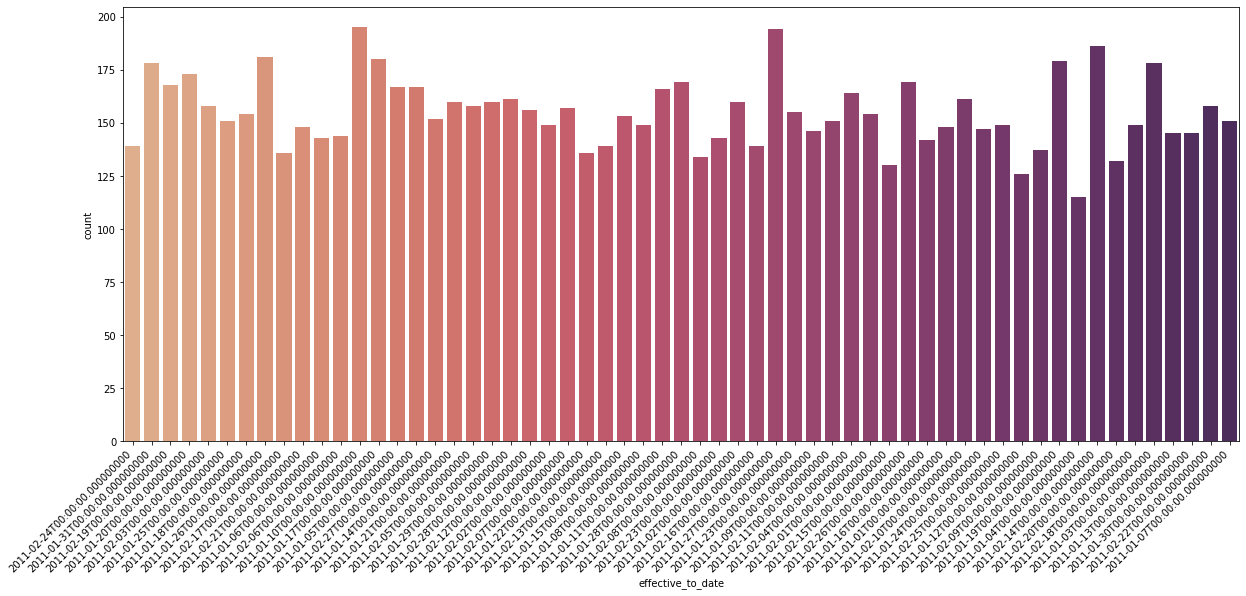

In [27]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(pd.to_datetime, errors='coerce')

plt.figure(figsize=(20,8))
todate_chart = sns.countplot(
    data=customer_df,
    x='effective_to_date',
    palette='flare'
)

todate_chart.set_xticklabels(todate_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

None


Didn't manage to get the dates in the right order

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [28]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import inv_boxcox
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, LabelEncoder
import pickle


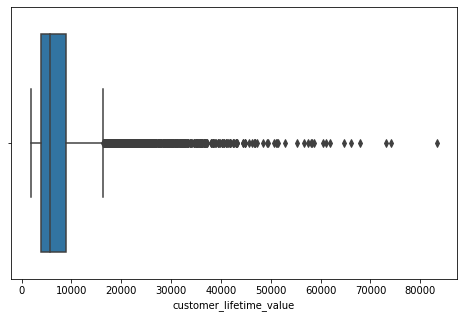

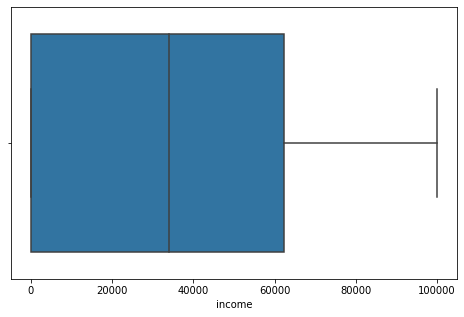

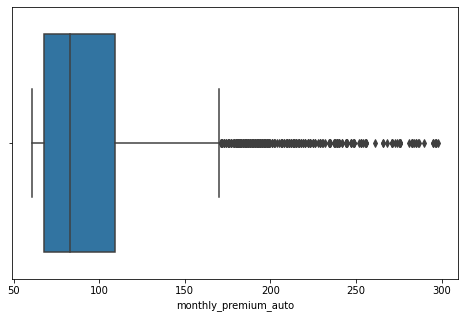

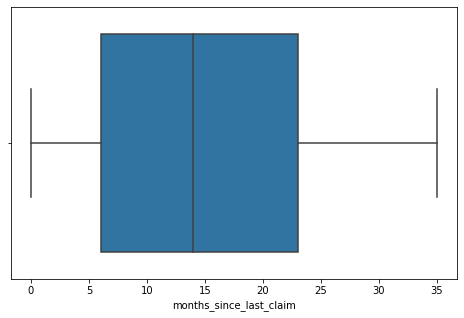

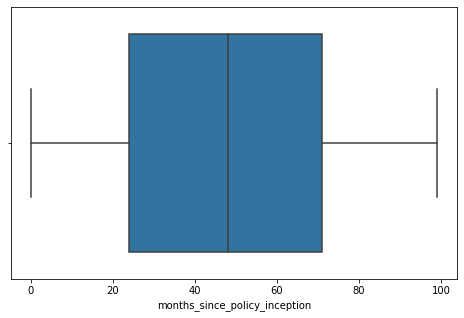

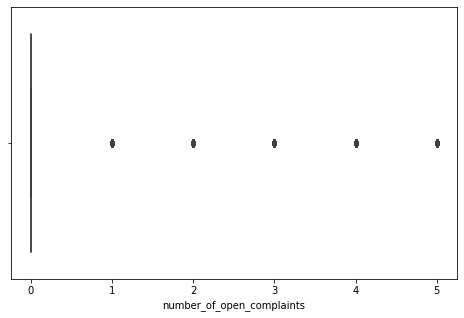

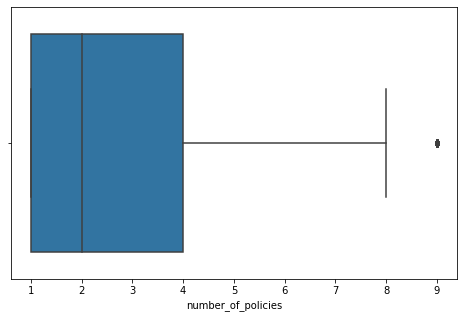

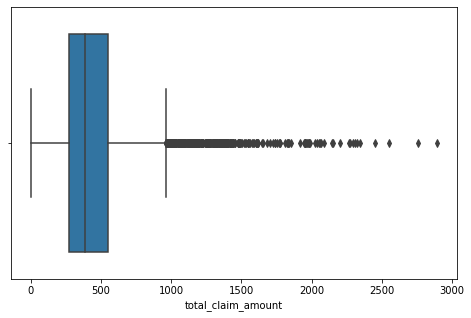

In [29]:
for column in customer_df.select_dtypes(np.number):
    plt.figure(figsize=(8,5))
    sns.boxplot(customer_df[column])
    plt.show()

In [30]:
def replace_outliers(df, threshold=1.5, in_columns=[], skip_columns=[], median_repl=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            
            if column not in median_repl:
                df.loc[df[column] > upper_limit, column] = upper_limit
                df.loc[df[column] < lower_limit, column] = lower_limit
            else:
                df.loc[df[column] > upper_limit, column] = df[column].median()
                df.loc[df[column] < lower_limit, column] = df[column].median()
    return df

In [31]:
num_columns = list(customer_df.select_dtypes(include=[np.number]).columns.values)

customer_df = replace_outliers(customer_df, in_columns=num_columns, skip_columns=['income', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints'], median_repl=num_columns)

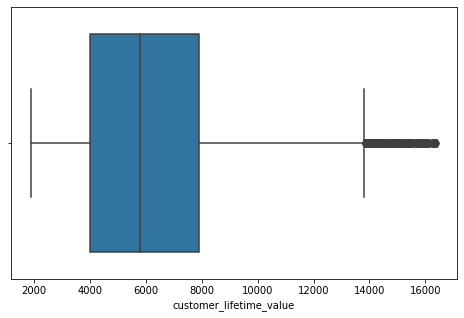

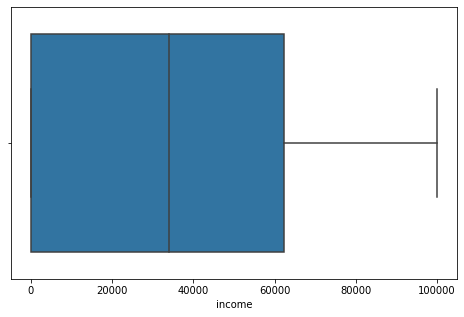

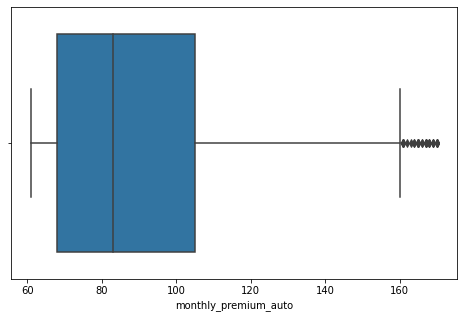

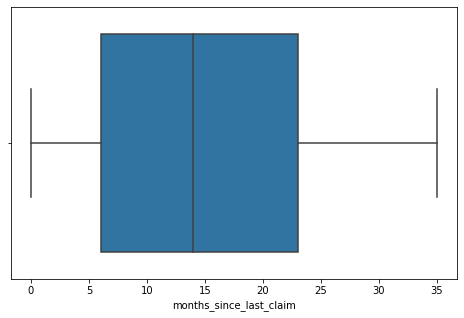

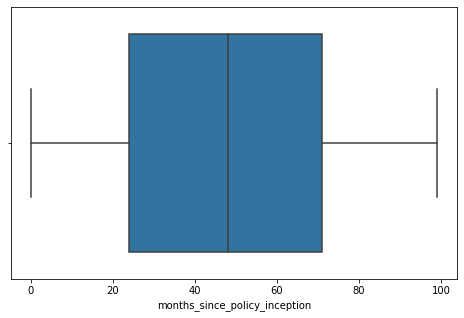

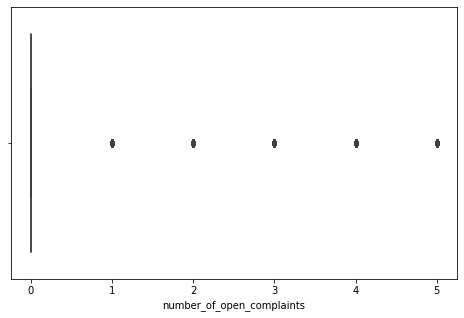

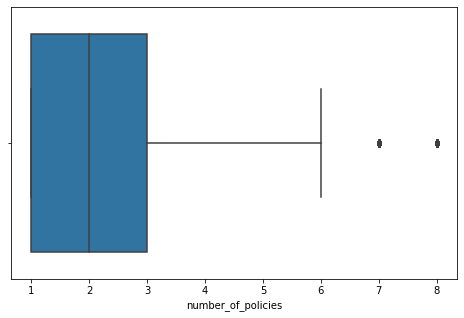

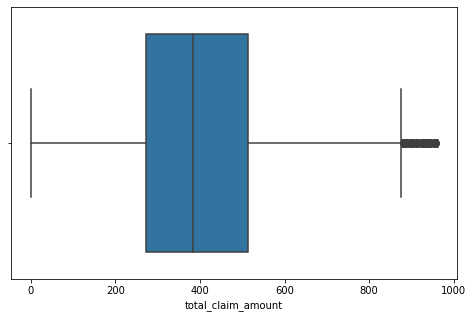

In [32]:
for column in customer_df.select_dtypes(np.number):
    plt.figure(figsize=(8,5))
    sns.boxplot(customer_df[column])
    plt.show()

### 2. Create a copy of the dataframe for the data wrangling.

In [33]:
customer_df2 = customer_df.copy()

### 3. Normalize the continuous variables. You can use any one method you want.

In [34]:
df2_num = customer_df2.select_dtypes(include=[np.number])


In [35]:
stsc_transformer = StandardScaler() 
stsc_transformer.fit(df2_num) 

with open('ss_transformer.pkl', 'wb') as file:
    pickle.dump(stsc_transformer, file)

with open('ss_transformer.pkl', 'rb') as file:
    stsc_transformer = pickle.load(file)

data_normalized = stsc_transformer.transform(df2_num)

df2_numnorm = pd.DataFrame(data_normalized, index=df2_num.index, columns=df2_num.columns)
df2_numnorm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
id,,,,,,,,
BU79786,-1.121421,0.612827,-0.821791,1.678099,-1.543287,-0.42225,-0.824187,-0.023907
QZ44356,0.240692,-1.239617,0.296267,-0.208186,-0.217334,-0.42225,2.677963,-0.028112
AI49188,2.149419,0.365710,0.922380,0.288205,-0.360680,-0.42225,-0.323880,0.858487
WW63253,0.455969,-1.239617,0.832935,0.288205,0.606907,-0.42225,2.177656,0.680752
HB64268,-1.105211,0.203390,-0.642902,-0.307465,-0.145661,-0.42225,-0.824187,-1.222123


### 4. Encode the categorical variables

In [36]:
df2_cat = customer_df2.select_dtypes(include=[np.object])

for column in df2_cat:
    print(column, df2_cat[column].unique(), '\n')

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

response ['No' 'Yes'] 

coverage ['Basic' 'Extended' 'Premium'] 

education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

employment_status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'] 

gender ['F' 'M'] 

location_code ['Suburban' 'Rural' 'Urban'] 

marital_status ['Married' 'Single' 'Divorced'] 

policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto'] 

policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3'] 

renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4'] 

sales_channel ['Agent' 'Call Center' 'Web' 'Branch'] 

vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car'] 

vehicle_size ['Medsize' 'Small' 'Large'] 



variables for OneHot encoding:

- state
- respone
- gender
- marital status
- policy type
- policy
- renew offer type
- sales channel
- vehicle class

In [37]:
# OneHot encoding

df2_onehot = df2_cat.drop(['coverage','education', 'employment_status', 'location_code', 'vehicle_size'], axis=1)
df2_onehot = pd.get_dummies(df2_onehot, drop_first=True)

df2_onehot.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


variables for ordinal encoding:

- coverage
- education
- employment status
- location code
- vehicle size

In [38]:
# ordinal encoding

df2_ord = df2_cat.drop(['state', 'response', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class'], axis=1)

df2_ord['coverage'] = df2_ord['coverage'].map({'Basic' : 1, 'Extended' : 2, 'Premium' : 3})
df2_ord['education'] = df2_ord['education'].map({'High School or Below' : 1, 'College' : 2, 'Bachelor' : 3, 'Master' : 4, 'Doctor' : 5})
df2_ord['employment_status'] = df2_ord['employment_status'].map({'Unemployed' : 1, 'Medical Leave' : 2, 'Disabled' : 3, 'Employed' : 4, 'Retired' : 5})
df2_ord['location_code'] = df2_ord['location_code'].map({'Rural' : 1, 'Suburban' : 2, 'Urban' : 3})
df2_ord['vehicle_size'] = df2_ord['vehicle_size'].map({'Small': 1, 'Medsize': 2, 'Large': 3})

df2_ord.head()

,coverage,education,employment_status,location_code,vehicle_size
id,,,,,
BU79786,1,3,4,2,2
QZ44356,2,3,1,2,2
AI49188,3,3,4,2,2
WW63253,1,3,1,2,2
HB64268,1,3,4,1,2


In [39]:
df2_encoded = pd.concat([df2_onehot, df2_ord], axis=1)

df2_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,education,employment_status,location_code,vehicle_size
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,4,2,2
QZ44356,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,3,1,2,2
AI49188,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,4,2,2
WW63253,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,3,1,2,2
HB64268,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,1,2


### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [40]:
df2_etd = customer_df2.select_dtypes(include=['datetime'])

df2_etd.head()

,effective_to_date
id,
BU79786,2011-02-24
QZ44356,2011-01-31
AI49188,2011-02-19
WW63253,2011-01-20
HB64268,2011-02-03


In [41]:
df2_etd['etd_day'] = df2_etd['effective_to_date'].dt.day
df2_etd['etd_week'] = df2_etd['effective_to_date'].dt.week
df2_etd['etd_month'] = df2_etd['effective_to_date'].dt.month

df2_etd = df2_etd.drop(['effective_to_date'], axis=1)

df2_etd.head()

,etd_day,etd_week,etd_month
id,,,
BU79786,24,8,2
QZ44356,31,5,1
AI49188,19,7,2
WW63253,20,3,1
HB64268,3,5,2


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [42]:
customer_df3 = pd.concat([df2_numnorm, df2_encoded, df2_etd], axis=1)

customer_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   float64
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   float64
 7   total_claim_amount             9134 non-null   float64
 8   state_California               9134 non-null   uint8  
 9   state_Nevada                   9134 non-null   uint8  
 10  state_Oregon                   9134 non-null   uint8  
 11  state_Washington               9134 non-null   uint8  
 12  response_Yes                   9134 non-null

# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
X = customer_df3.drop(['total_claim_amount'], axis=1)
y = customer_df3['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [45]:
lr0 = LinearRegression()
model = lr0.fit(X,y)

predictions = lr0.predict(X)

r2 = round(lr0.score(X,y),3)
rmse = round(mean_squared_error(y, predictions, squared=False), 3)
mse = round(mean_squared_error(y, predictions, squared=True), 3)
mae = round(mean_absolute_error(y, predictions), 3)

print('R2 score:', r2, '\n', 'RMSE:', rmse, '\n', 'MSE:', mse, '\n', 'MAE:', mae)

R2 score: 0.448 
 RMSE: 0.743 
 MSE: 0.552 
 MAE: 0.581


### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [46]:
# function inputs: df=dataframe, target=target column, models=list of models from 'LR', 'KNN', MLPR , testsize=test set size, random_no=random state, k = k value for KNN model

def regression_models(df, target, models, testsize, random_no, k=5):
    # x-y-split
    X = df.drop([target], axis=1)
    y = df[target]
    
    # train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=random_no)
    
    # lists for model acurracy measures
    model_names = []
    list_r2 = []
    list_r2adj = []
    list_rmse = []
    list_mse = []
    list_mae = []
    
    # model execution
    for m in models:
        if m == 'lr':
            model = LinearRegression()
            model_names.append('Linear Regression')
        elif m == 'knn':
            model = KNeighborsRegressor(n_neighbors=k)
            model_names.append('KNN')
        elif m == 'mlpr':
            model = MLPRegressor()
            model_names.append('MLP Regressor')
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # model evaluation
        r2 = round(r2_score(y_test, predictions), 3)
        r2adj = round(1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 3)
        rmse = round(mean_squared_error(y_test, predictions, squared=False), 3)
        mse = round(mean_squared_error(y_test, predictions, squared=True), 3)
        mae = round(mean_absolute_error(y_test, predictions), 3)
        
        list_r2.append(r2)
        list_r2adj.append(r2adj)
        list_rmse.append(rmse)
        list_mse.append(mse)
        list_mae.append(mae)
    
    # df for model comparison
    data_results = {'Model': model_names, 'R2': list_r2, 'R2 Adj.': list_r2adj, 'RMSE': list_rmse, 'MSE': list_mse, 'MAE': list_mae}
    model_comparison = pd.DataFrame(data=data_results)
    
    return model_comparison.style.hide_index()

### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [47]:
# comparing LR, KNN and MLPR model

results = regression_models(df=customer_df3, target='total_claim_amount', models=['lr', 'knn', 'mlpr'], testsize=0.2, random_no=8)
results

Model,R2,R2 Adj.,RMSE,MSE,MAE
Linear Regression,0.466000,0.453000,0.738000,0.545000,0.576000
KNN,0.401000,0.386000,0.782000,0.611000,0.579000
MLP Regressor,0.700000,0.693000,0.553000,0.306000,0.403000


In [48]:
# comparing the accuracy of KNN models with different k values

# function inputs: df=dataframe, target=target column, models=list of models from 'LR', 'KNN', MLPR , testsize=test set size, random_no=random state, k = range funtion for k values
def knn_multiple(df, target, testsize, random_no, k_range):
    
    # x-y-split
    X = df.drop([target], axis=1)
    y = df[target]
    
    # train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=random_no)
    
    knn_r2 = []
    k_list = []

    for k in k_range:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        knn_r2.append(model.score(X_test, y_test))
        k_list.append(k)
     
    # plot k value vs. r2
    plt.figure(figsize=(10,6))
    plt.plot(k_range,knn_r2,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('accuracy scores vs. k value')
    plt.xlabel('K')
    plt.ylabel('R2')
    
    # df for model comparison
    knn_results = {'KNN with k value': k_list, 'R2': knn_r2}
    knn_comparison = pd.DataFrame(data=knn_results)
    
    return knn_comparison.style.hide_index()


KNN with k value,R2
2,0.267421
3,0.349398
4,0.388812
5,0.401257
6,0.404393
7,0.405900
8,0.400645
9,0.398724
10,0.398839
11,0.402536


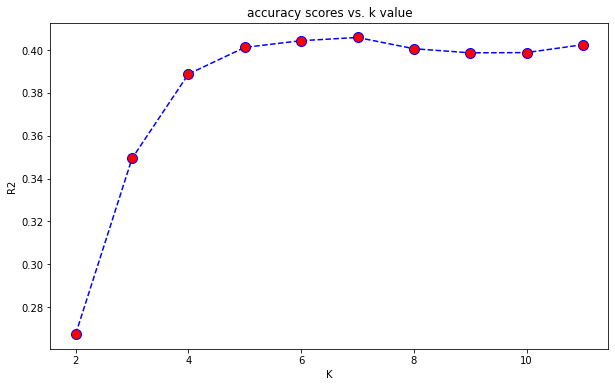

In [49]:
knn_test = knn_multiple(df=customer_df3, target='total_claim_amount', testsize=0.2, random_no=8, k_range=range(2,12))
knn_test

### 5. You can check also the MLPRegressor for this task!

MLPRegressor model is part of the comparison in 4.

### 6. Check and discuss the results.

- Having performed only scaling to numerical variables and encoding of categorical variables, the LR and KNN models dont perform that well. 
MLP Regressor achieves an okay accuracy (0.69) performing the best with respect to R2 scores. 
- changing the k values above 5 doesnt have a significant positive impact on accuracy. 5 is therefore the best pick as a k values with an r2 score with little difference to the maximum and performing better then values between 2 and 4. 

> The data would still have to be manipulated by testing different transformation tecniques to see if the model performance can be improved

# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

### 1. Get the numerical variables from our dataset.

In [50]:
customer_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
id,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

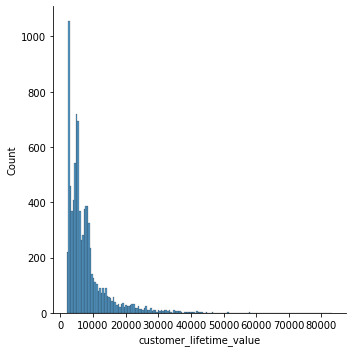

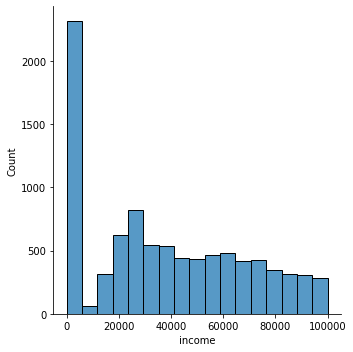

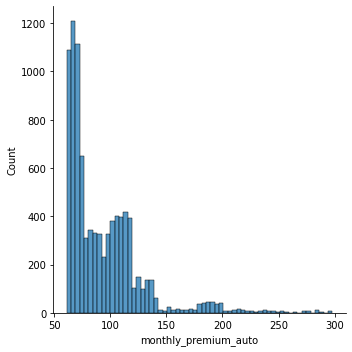

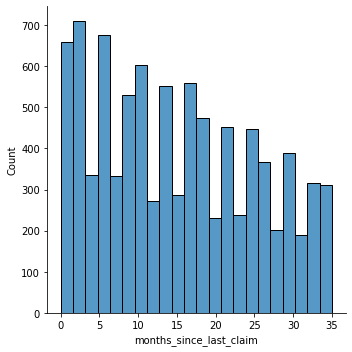

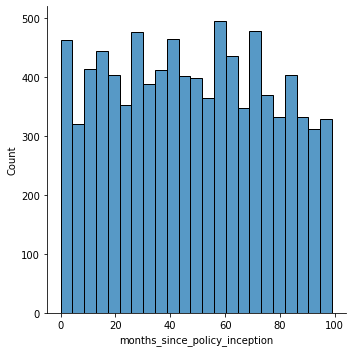

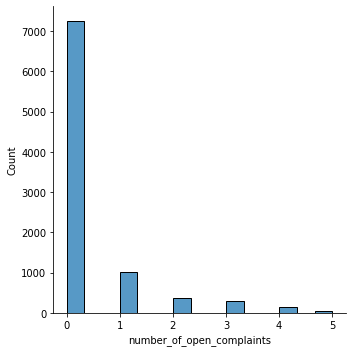

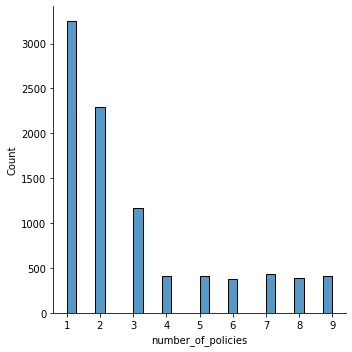

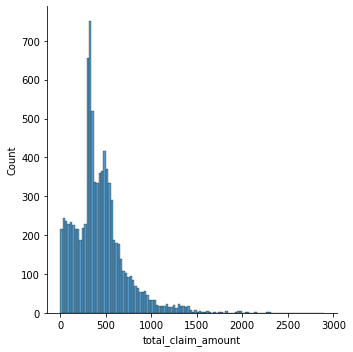

In [51]:
for column in customer_num:
    sns.displot(customer_num[column])
    plt.show()

> Most varables are more similar to an exponential distribution than a normal distribution. Exceptions are 'months since last claim' and 'month since policy inception' which look like neither.

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#### boxcox transformation

In [52]:
def boxcox_transform(df, in_columns, skip_columns=[]):
    _ci = {column: None for column in in_columns}
    for column in in_columns:
        if column not in skip_columns:
            df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
            df[column] = df[column].fillna(df[column].median())
            transformed_data, ci = stats.boxcox(df[column])
            df[column] = transformed_data
            _ci[column] = [ci] 
    return df, _ci

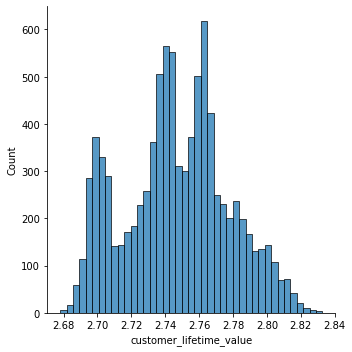

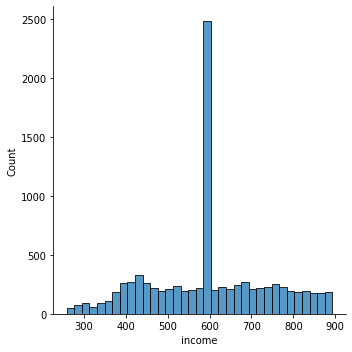

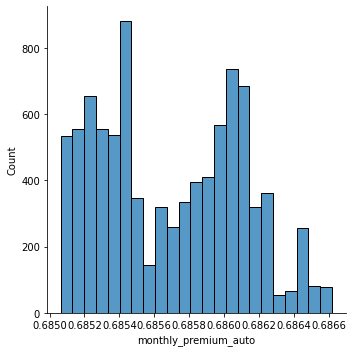

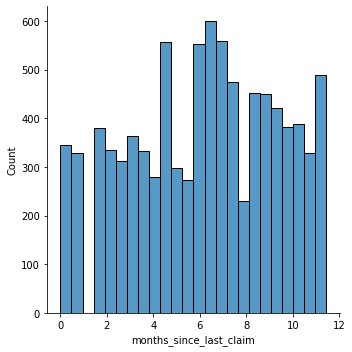

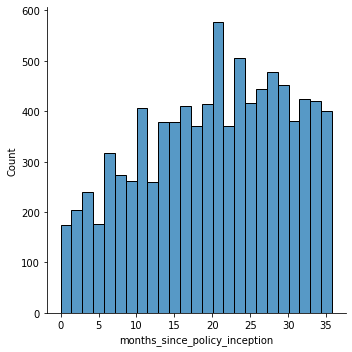

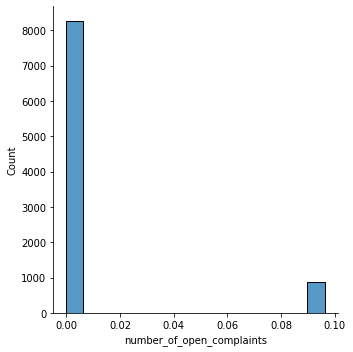

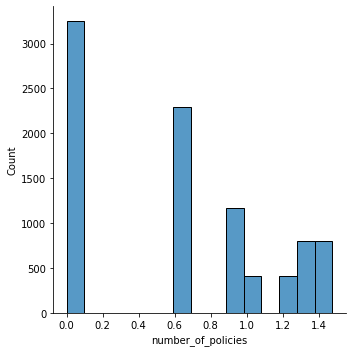

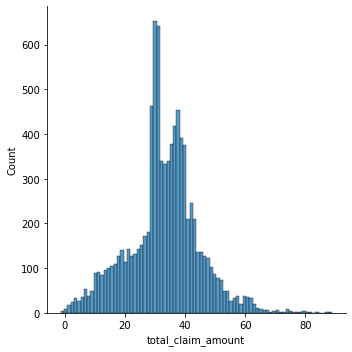

In [53]:
customer_numcol = list(customer_num.select_dtypes(include=[np.number]).columns.values)

customer_num_boxcox, _ci = boxcox_transform(customer_num, in_columns=customer_numcol)

for column in customer_num_boxcox:
    sns.displot(customer_num_boxcox[column])
    plt.show()

> The boxcox transformation brings 'customer lifetime value' and 'total claim amount' closer to a normal distribution. 'income' gets a very high value count around the mean but the rest of the values are distributed more or less evenly. The other variables don't get closer to a normal distribution.

#### log transformation

In [54]:
def log_transfom(df, in_columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
            df[column] = df[column].fillna(df[column].median())
            df[column] = np.log(df[column])
    return df
            

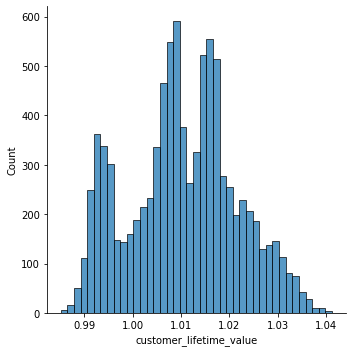

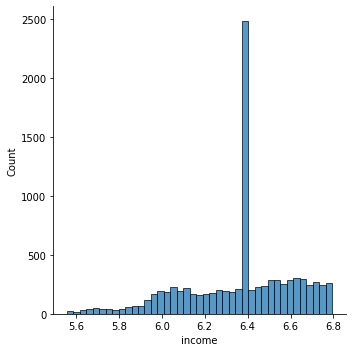

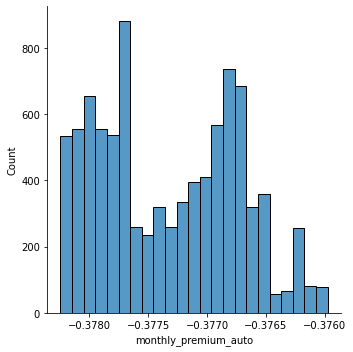

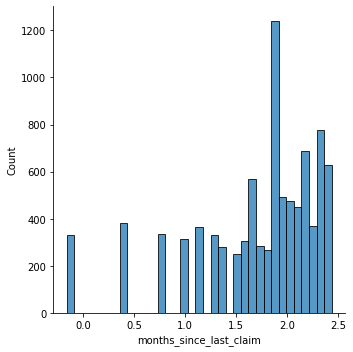

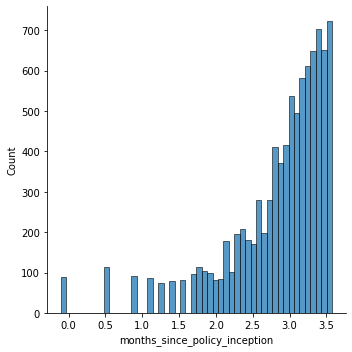

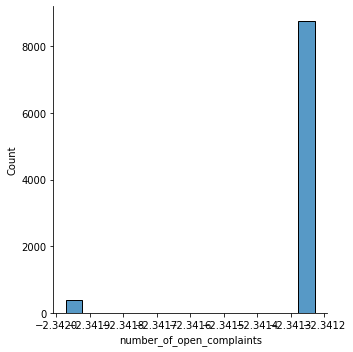

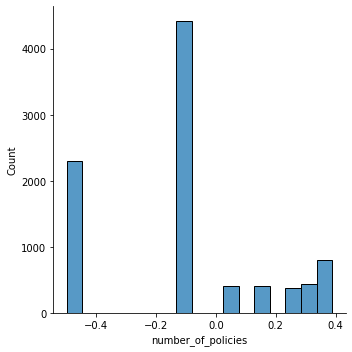

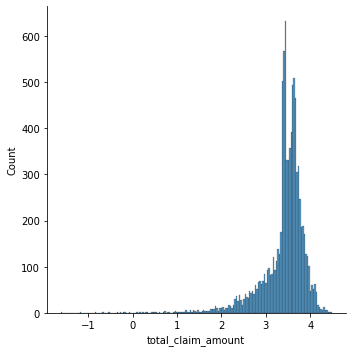

In [55]:
customer_num_log = log_transfom(customer_num, in_columns=customer_numcol)

for column in customer_num_log:
    sns.displot(customer_num_log[column])
    plt.show()

> The boxcox transformation brings 'customer lifetime value' closer to a normal distribution. Similar to the boxcox transformation 'income' gets a very high value count on the right side close to the mean but the rest of the values are distributed more or less evenly. The other variables don't benefit from the transformation.